# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
print(A, A.shape)

[[ 0  0 51 ... 74 73 97]
 [18 98 22 ... 75 35  1]
 [59 78 90 ... 76 91 28]
 ...
 [39 38  7 ... 22 55 71]
 [75 69 67 ... 46 67 66]
 [14 95 11 ... 10 93 94]] (200, 50)


# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
B = A.copy()
np.random.shuffle(B.T)
print(B, B.shape)

[[44 50 11 ... 37 86 70]
 [77  7 93 ... 12 48 49]
 [31 66 59 ... 58 93 41]
 ...
 [44 43 90 ... 20  2 26]
 [71 86 55 ... 71 79 92]
 [77 59 64 ... 56 43 38]] (200, 50)


# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
C = A[A[:, ::2].sum(axis=1) > A[:, 1::2].sum(axis=1).mean()]
print(C, C.shape)

[[59 78 90 ... 76 91 28]
 [80 52 71 ... 38 15 38]
 [77 51 90 ... 19 33 93]
 ...
 [83 77 24 ... 92 68 84]
 [75 69 67 ... 46 67 66]
 [14 95 11 ... 10 93 94]] (88, 50)


# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [4]:
print((np.max(A, axis=1) - np.min(A, axis=1)).argmax())

3


# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [5]:
print(A.ravel().argsort().reshape(A.shape) + 1)

[[   1 7648 4561 ... 2345 2086 9001]
 [9026 9053 9481 ... 1637 2730 1603]
 [4729 6282 4717 ... 2246 2258 9091]
 ...
 [2274 8441 2517 ...  608 3047 4072]
 [8274 7875 2791 ... 7463 8876 1892]
 [2052  190 5045 ... 5624 9111  658]]


# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [6]:
D = (A - A.min(axis=1).reshape(-1, 1)).astype(np.float64) / (A.max(axis=1) - A.min(axis=1)).reshape(-1, 1).astype(np.float64)
print(D, D.shape)

[[0.         0.         0.5257732  ... 0.7628866  0.75257732 1.        ]
 [0.17525773 1.         0.21649485 ... 0.7628866  0.35051546 0.        ]
 [0.58888889 0.8        0.93333333 ... 0.77777778 0.94444444 0.24444444]
 ...
 [0.38541667 0.375      0.05208333 ... 0.20833333 0.55208333 0.71875   ]
 [0.75757576 0.6969697  0.67676768 ... 0.46464646 0.67676768 0.66666667]
 [0.13402062 0.96907216 0.10309278 ... 0.09278351 0.94845361 0.95876289]] (200, 50)


# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [7]:
E = np.tile(A, (10, 1))
E = E.reshape(10, *A.shape) * np.arange(1, 11).reshape(10, 1, 1)
print(E, E.shape)

[[[  0   0  51 ...  74  73  97]
  [ 18  98  22 ...  75  35   1]
  [ 59  78  90 ...  76  91  28]
  ...
  [ 39  38   7 ...  22  55  71]
  [ 75  69  67 ...  46  67  66]
  [ 14  95  11 ...  10  93  94]]

 [[  0   0 102 ... 148 146 194]
  [ 36 196  44 ... 150  70   2]
  [118 156 180 ... 152 182  56]
  ...
  [ 78  76  14 ...  44 110 142]
  [150 138 134 ...  92 134 132]
  [ 28 190  22 ...  20 186 188]]

 [[  0   0 153 ... 222 219 291]
  [ 54 294  66 ... 225 105   3]
  [177 234 270 ... 228 273  84]
  ...
  [117 114  21 ...  66 165 213]
  [225 207 201 ... 138 201 198]
  [ 42 285  33 ...  30 279 282]]

 ...

 [[  0   0 408 ... 592 584 776]
  [144 784 176 ... 600 280   8]
  [472 624 720 ... 608 728 224]
  ...
  [312 304  56 ... 176 440 568]
  [600 552 536 ... 368 536 528]
  [112 760  88 ...  80 744 752]]

 [[  0   0 459 ... 666 657 873]
  [162 882 198 ... 675 315   9]
  [531 702 810 ... 684 819 252]
  ...
  [351 342  63 ... 198 495 639]
  [675 621 603 ... 414 603 594]
  [126 855  99 ...  90 837 8

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [8]:
F = np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)
print(F, F.shape)

[[ 0 51  3 ... 14 74 97]
 [18 22 95 ... 75 75  1]
 [59 90 69 ... 18 76 28]
 ...
 [39  7 14 ... 51 22 71]
 [75 67  8 ... 26 46 66]
 [14 11 86 ... 13 10 94]] (200, 50)


# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [9]:
print((A > 5).all(axis=1).sum())

9


# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [10]:
G = np.array(np.split(A, 10)).mean(axis=0)
print(G, G.shape)

[[25.6 33.3 55.9 58.2 56.7 36.  64.5 42.  51.7 46.8 54.5 53.8 55.  48.1
  36.8 55.7 50.8 52.  52.5 48.6 30.2 46.4 49.9 38.7 38.1 35.6 65.4 52.7
  59.1 52.8 37.9 55.2 68.  54.1 46.6 37.4 53.2 32.3 63.3 66.7 53.1 54.9
  48.4 55.2 48.1 47.  60.7 44.9 63.3 50.5]
 [45.9 55.4 31.7 46.3 47.2 68.4 40.6 56.5 56.8 64.4 51.1 40.1 42.1 57.1
  44.2 51.3 42.1 43.9 46.  49.4 39.9 57.1 46.  45.3 25.2 50.3 43.  50.6
  40.  41.9 45.9 61.1 56.  50.8 55.2 39.8 50.9 33.2 51.1 52.  41.  39.9
  55.  40.8 44.9 52.  46.4 42.8 43.7 36.3]
 [40.2 60.5 53.5 51.1 54.1 62.1 48.6 50.1 59.4 43.4 60.2 60.5 40.3 51.4
  48.2 54.9 53.8 39.2 48.5 53.1 34.6 46.7 45.8 56.4 50.3 45.3 41.1 48.1
  38.3 53.3 33.3 66.3 40.  60.2 51.6 52.3 48.3 62.3 45.7 47.7 41.3 58.9
  41.  42.1 59.6 53.3 57.2 59.2 64.8 39.3]
 [53.8 51.2 49.5 58.6 51.2 43.2 45.8 61.  42.3 54.2 60.6 35.7 56.2 55.9
  53.4 62.  46.4 55.7 63.  55.4 40.9 52.7 56.1 63.6 54.8 41.8 47.7 44.3
  50.8 46.9 44.4 34.9 56.3 61.3 30.2 58.8 39.5 67.1 50.3 50.3 53.7 56.6
  54.6 

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [11]:
A.ravel()[np.sort(np.unique(A, return_index=True)[1])]

array([ 0, 51, 81,  3, 78, 50, 64, 55,  9, 86, 59, 52, 42, 61, 31, 94, 33,
       44, 12, 53, 13, 16, 84, 54, 60, 56, 11, 70, 37, 67, 68, 14, 74, 73,
       97, 18, 98, 22, 95, 58,  7, 80,  4, 43, 26, 76, 69, 30, 47,  5, 77,
       79,  2, 35, 39, 24, 88, 90, 25, 93, 49, 48, 92, 38, 15, 87, 40, 75,
        1, 66, 19, 82, 45,  6, 71, 96, 17, 57, 72, 41, 89, 10, 91, 28, 36,
       27, 23, 29, 99, 34, 32, 85, 20, 21, 62, 63,  8, 83, 46, 65])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [12]:
def euclidean(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.sqrt(np.power(x - y, 2).sum())
H = np.apply_along_axis(euclidean, 1, A, A.mean(axis=0))
print(H, H.shape)

[198.32309441 218.40647833 193.12340556 242.08614123 214.17422762
 200.23184006 203.53974986 198.23798772 200.72797457 171.9822368
 219.8707115  204.5464245  212.29576014 215.27435931 216.85702611
 214.36454878 196.14520074 208.40834862 224.56397702 230.14132566
 186.0191382  214.57996126 206.34127017 175.36655831 194.0516678
 193.63442301 217.45291393 189.43273153 203.54500676 199.52105096
 201.70842763 198.55722041 229.0740705  186.425105   210.49045056
 207.97954172 207.71319114 211.62858922 207.40911208 197.15656158
 209.59129222 199.37126116 221.75278978 194.90259048 210.90519144
 210.547975   186.78573226 197.08926854 193.36548238 199.10296275
 197.03426041 205.52311251 213.99109742 184.14040777 181.83429208
 197.89908988 200.37978884 187.14649282 210.16117571 218.44793379
 210.58622884 192.3249328  199.086011   183.83924982 213.94658159
 183.38301387 218.04547639 198.88971762 187.58587307 201.7410959
 200.45510663 219.52653547 207.01980527 209.10021467 192.86539289
 209.49214729

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [13]:
I = A * np.where(A > 50, 2, 3)
print(I, I.shape)

[[  0   0 102 ... 148 146 194]
 [ 54 196  66 ... 150 105   3]
 [118 156 180 ... 152 182  84]
 ...
 [117 114  21 ...  66 110 142]
 [150 138 134 ... 138 134 132]
 [ 42 190  33 ...  30 186 188]] (200, 50)


# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [14]:
J1 = np.convolve(A.ravel(), np.ones(3)) / 3
J2 = np.convolve(A.ravel(), np.ones(5)) / 5
J3 = np.convolve(A.ravel(), np.ones(10)) / 10
print(J1.sum(), J2.sum(), J3.sum())



499841.0 499841.0 499841.0


# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

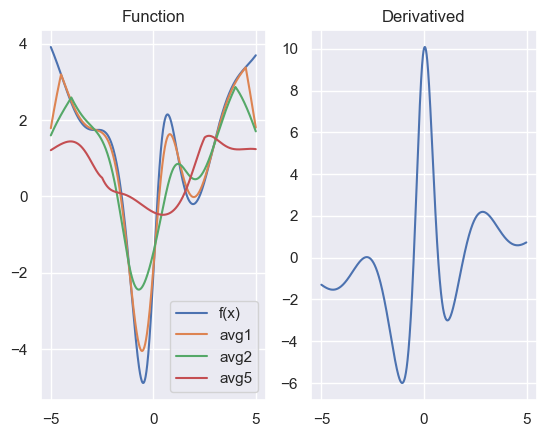

In [15]:

def func(x: np.ndarray) -> np.ndarray:
    return (5 * np.sin(2 * x) - np.power(np.cos(x), 2) - 1 + np.abs(np.power(x, 3)) - np.power(x, 2)) / (np.power(x, 2) + 1)

delta, step = 0.0001, 0.01
from_, to = -5., 5.

x = np.arange(from_, to, step=step, dtype=np.float64)
y = func(x)
d = (func(x + delta) - y) / delta
avg1 = np.convolve(y, np.ones(np.int64(1 / step)), mode='same') / (1 / step)
avg2 = np.convolve(y, np.ones(np.int64(2 / step)), mode='same') / (2 / step)
avg5 = np.convolve(y, np.ones(np.int64(5 / step)), mode='same') / (5 / step)

plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.plot(x, avg1)
plt.plot(x, avg2)
plt.plot(x, avg5)
plt.legend(['f(x)', 'avg1', 'avg2', 'avg5'])
plt.title('Function')

plt.subplot(1, 2, 2)
plt.plot(x, d)
plt.title('Derivatived')

plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [16]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 1, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [17]:
sample = ([50, 3, 1, 7, 20]) 
c = len(sample)
s = np.cumsum(sample)
randc = (np.random.random(c)*np.sum(sample)).reshape(c,1)
rerandc = np.tile(randc,c).reshape(c,c)
print(np.argmax(np.greater(s,rerandc),axis=1))





[4 0 0 0 0]


# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [18]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1644

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

walk.numpy - 1000 times: 0.23215s
walk.python - 1000 times: 5.64185s


<AxesSubplot: ylabel='Density'>

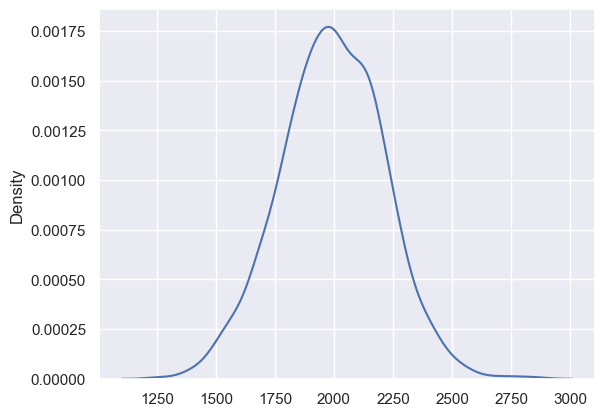

In [19]:
import time
import typing as _t
from functools import wraps


def timeit(count: int, name: _t.Optional[str] = None) -> _t.Callable:
    def wrapper(func: _t.Callable) -> _t.Callable:
        funcname = name if name else func.__name__
        @wraps(func)
        def clock(*args, **kwargs) -> _t.List:
            start = time.time()
            result = [func(*args, **kwargs) for _ in range(count)]
            end = time.time()
            print(f'{funcname} - {count} times: {end - start:.5f}s')
            return result
        return clock
    return wrapper

data = [-3, -1, 0, 2, 3]

@timeit(1000, name='walk.numpy')
def walk_numpy(n: int) -> int:
    return np.random.choice(data, n).sum()

walk_python = timeit(1000, name='walk.python')(walk)

result = walk_numpy(10_000)
walk_python(10_000)
sns.kdeplot(result)


# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [20]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return np.float64(t)


a = np.random.random((100, 100))
strange_conv(a)


0.892102013201815

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [21]:
#Numba
import numpy as np
from numba import jit

@jit
def strange_conv(a: np.ndarray) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return np.float64(t)

a = np.random.random((100, 100))
strange_conv(a)



0.3221484119330256

In [22]:
#Cython
